In [ ]:
pip install empiricaldist

In [ ]:
pip install pycountry

In [ ]:
pip install geopandas

In [ ]:
pip install mapclassify

In [5]:
from empiricaldist import Pmf
from empiricaldist import Cdf

In [6]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
import pycountry
import geopandas

In [ ]:
#pd.__version__
#pd.show_versions()

Data source:

https://www.ctdatacollaborative.org/global-synthetic-dataset

# Load the data

In [7]:
from google.colab import drive
drive.mount('/content/drive')
# Project Directory path 
project_dir = 'drive/MyDrive/DAB103-new/'

Mounted at /content/drive


In [ ]:
import glob
# Using '*' pattern 
print('\nNamed with wildcard *:')
for name in glob.glob(project_dir+'*'):
    print(name)

In [68]:
ctdc = pd.read_csv(project_dir+ 'CTDC.tsv',sep='\t')
ctdc

,yearOfRegistration,gender,ageBroad,majorityStatusAtExploit,traffickMonths,citizenship,CountryOfExploitation,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlThreats,...,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourOther,typeOfSexProstitution,typeOfSexPornography,typeOfSexOther,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther
0,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,2015.0,Male,30--38,NaN,13--24 (1-2 yrs),UKR,RUS,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ctdc.duplicated().any()

In [11]:
ctdc.duplicated().sum()

132164

In [ ]:
#ctdc.drop_duplicates(inplace=True)

In [ ]:
type(ctdc)

In [ ]:
ctdc.nunique()

In [ ]:
len(ctdc)

In [ ]:
ctdc.values

In [ ]:
ctdc.index

In [ ]:
ctdc.columns

In [ ]:
ctdc.keys()

In [ ]:
#list feature names, types and distinct values
feature_names=list(ctdc.columns)
pd.DataFrame([[f, ctdc[f].dtype, ctdc[f].nunique()] for f in feature_names], 
              columns=['feature', 'type', 'distinct values'])

In [13]:
def FindMissingColsPercentage(df):

    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        # mean = sum / total
        pct = df[col].isnull().mean() * 100 
        if missing_vals != 0:
          print('{} => {} [{}%]'.format(col, df[col].isnull().sum(), round(pct, 2)))
        total += missing_vals
    
    if total == 0:
        print("no missing values")

In [14]:
FindMissingColsPercentage(ctdc)

yearOfRegistration => 39311 [20.36%]
gender => 47121 [24.41%]
ageBroad => 90781 [47.02%]
majorityStatusAtExploit => 152771 [79.14%]
traffickMonths => 172331 [89.27%]
citizenship => 88451 [45.82%]
CountryOfExploitation => 67361 [34.89%]
meansOfControlDebtBondage => 182851 [94.72%]
meansOfControlTakesEarnings => 172241 [89.22%]
meansOfControlThreats => 167911 [86.98%]
meansOfControlPsychologicalAbuse => 166761 [86.38%]
meansOfControlPhysicalAbuse => 174541 [90.41%]
meansOfControlSexualAbuse => 184251 [95.44%]
meansOfControlFalsePromises => 174391 [90.33%]
meansOfControlPsychoactiveSubstances => 184541 [95.59%]
meansOfControlRestrictsMovement => 168551 [87.31%]
meansOfControlRestrictsMedicalCare => 185031 [95.85%]
meansOfControlExcessiveWorkingHours => 176641 [91.5%]
meansOfControlThreatOfLawEnforce => 184001 [95.31%]
meansOfControlWithholdsNecessities => 181471 [94.0%]
meansOfControlWithholdsDocuments => 179171 [92.81%]
meansOfControlOther => 180221 [93.35%]
isForcedLabour => 150711 [78.

In [ ]:
ctdc.isnull().sum()

In [ ]:
len(ctdc.columns)

In [ ]:
ctdc.info()

In [ ]:
#describe columns of object type
ctdc.describe(include=['O'])

In [ ]:
ctdc.describe(include='all')

In [ ]:
#Drop only if entire row has NaN values
ctdc = ctdc.dropna(how='all')

In [ ]:
ctdc

In [ ]:
# overall correlations
ctdc.corr()

In [ ]:
ctdc.shape

(193025, 37)

In [ ]:
ctdc.shape[0]

In [ ]:
ctdc.shape[1]

# Simple Exporatory Data Analysis (EDA)

In [ ]:
ctdc.head(10)

In [ ]:
ctdc.tail(10)

In [ ]:
ctdc.sample(5)

In [18]:
#ctdc['yearOfRegistration'].isna().sum()
ctdc['yearOfRegistration'].isnull().sum()

39311

In [ ]:
ctdc['yearOfRegistration'].value_counts()

In [ ]:
ctdc['yearOfRegistration'].value_counts(ascending = True)

In [20]:
#change float column to int column, skip over NaN
ctdc['yearOfRegistration'] = ctdc['yearOfRegistration'].convert_dtypes(convert_integer=True)

In [ ]:
ctdc.yearOfRegistration.unique()

In [ ]:
ctdc.yearOfRegistration.unique().size

In [ ]:
#year.value_counts().sort_index()
#the same result with next code line
#year_num = ctdc.groupby(['yearOfRegistration']).size()

In [ ]:
#year_num_1 = year_num.to_frame(name = 'a')

Bar chart code source

https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/#:~:text=Following%20steps%20were%20followed%3A%201%20Define%20the%20x-axis,view%20your%20plot%2C%20we%20use%20.show%20%28%29%20function.

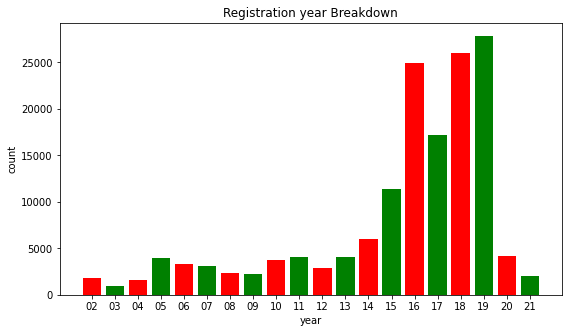

In [26]:
#convert year_num series to a dataframe year_num_df
year_num = ctdc.groupby(['yearOfRegistration']).size()
year_num_df = pd.DataFrame({'year':year_num.index.astype(int), 'num':year_num.values})
year_num_df["year"]

# x-coordinates of left sides of bars 
left = year_num_df["year"]
  
# heights of bars
height = year_num_df["num"]
  
# labels for bars
tick_label = ['02', '03','04','05','06',
              '07', '08','09','10','11',
              '12', '13','14','15','16',
              '17', '18','19','20','21']

#f, ax = plt.subplots(figsize=(18,5))
plt.figure(figsize=(9,5))
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
  
# naming the x-axis
plt.xlabel('year')
# naming the y-axis
plt.ylabel('count')
# plot title
plt.title('Registration year Breakdown')
  
# function to show the plot
plt.show()

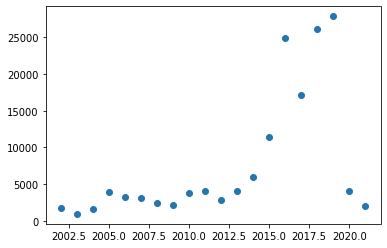

In [27]:
plt.scatter(year_num_df["year"],year_num_df["num"])
plt.show()

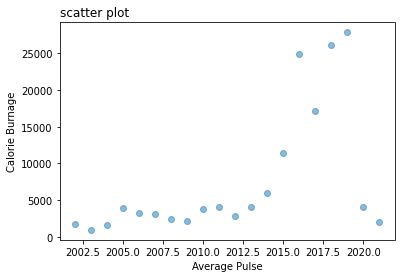

In [28]:
plt.title("scatter plot", loc = 'left')
plt.xlabel("Average Pulse")
plt.ylabel("Calorie Burnage")
plt.plot(year_num_df["year"],year_num_df["num"],'o',alpha=0.5)
plt.show()

In [ ]:
#sns.violinplot(x='year',y='num',data=year_num_df,inner=None)
#plt.show()

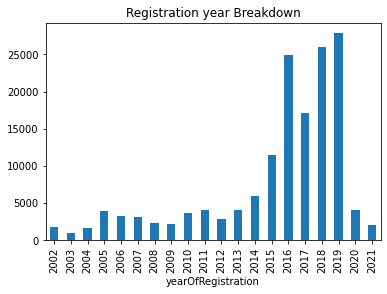

In [29]:
year_chart = year_num.plot(kind='bar', title='Registration year Breakdown')

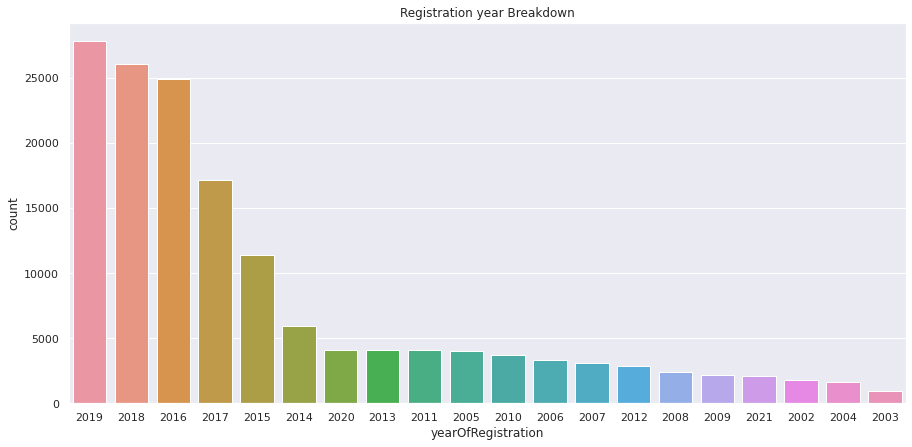

In [31]:
plt.title("Registration year Breakdown")
# order = ctdc['yearOfRegistration'].value_counts(ascending=False).index
# sns.countplot(x='yearOfRegistration', data=ctdc, order=order)

order = ctdc['yearOfRegistration'].value_counts().index
sns.set(rc={"figure.figsize":(15,7)}) 
sns.countplot(x='yearOfRegistration', data=ctdc, order= order)

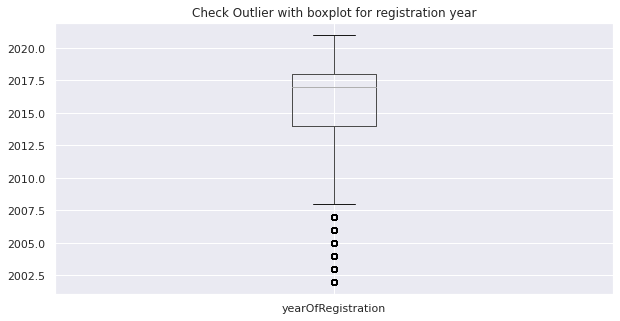

In [32]:
plt.figure(figsize=(10,5))
plt.title("Check Outlier with boxplot for registration year")
ctdc.boxplot(column=['yearOfRegistration']);

Text(0.5, 1.0, 'Registration year Distribution Plot')

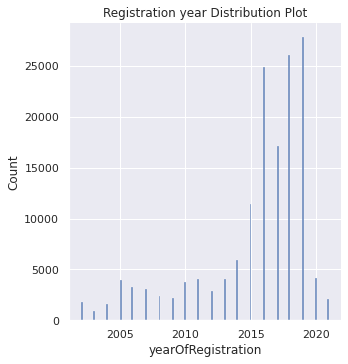

In [33]:
sns.displot(ctdc['yearOfRegistration'])
plt.title('Registration year Distribution Plot')

In [ ]:
type(ctdc.yearOfRegistration)

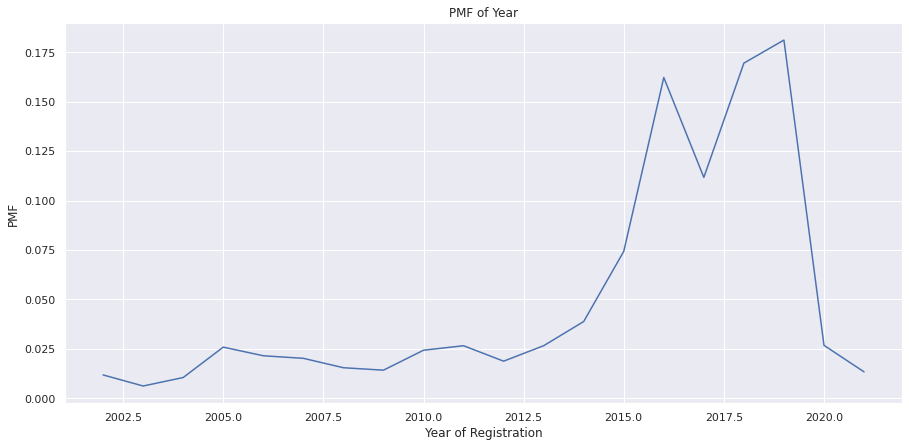

In [34]:
pmf_year_num = Pmf.from_seq(ctdc['yearOfRegistration'], normalize=True)
#pmf_year_num.bar()
pmf_year_num.plot()
#plt.figure(figsize=(5,3))
plt.xlabel('Year of Registration')
plt.ylabel('PMF')
plt.title('PMF of Year')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

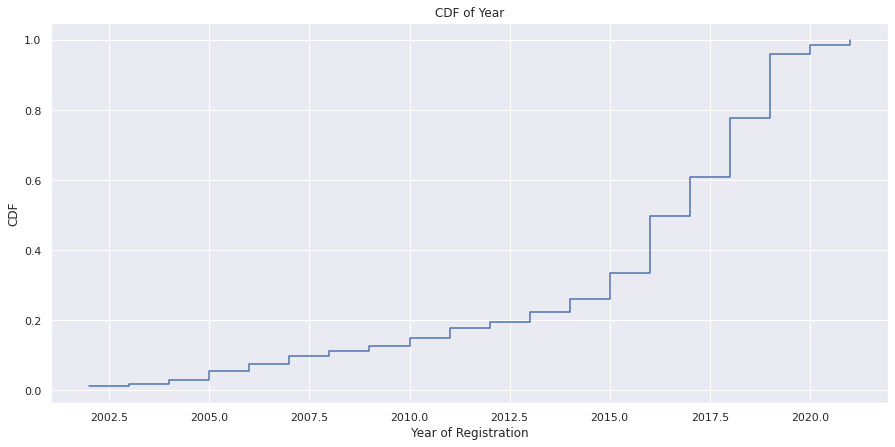

In [35]:
pmf_year_num = Cdf.from_seq(ctdc['yearOfRegistration'])
#pmf_year_num.plot()
pmf_year_num.step()
plt.xlabel('Year of Registration')
plt.ylabel('CDF')
plt.title('CDF of Year')
plt.show

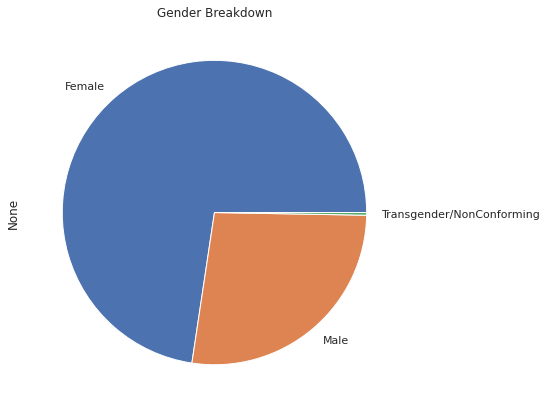

In [36]:
gender_num = ctdc.groupby(['gender']).size(); 
gender_chart = gender_num.plot(kind='pie', title='Gender Breakdown')

Text(0.5, 1.0, 'gender Type pie Chart')

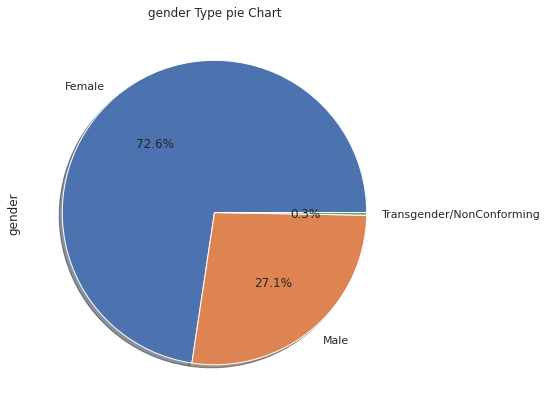

In [37]:
ctdc['gender'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title("gender Type pie Chart")

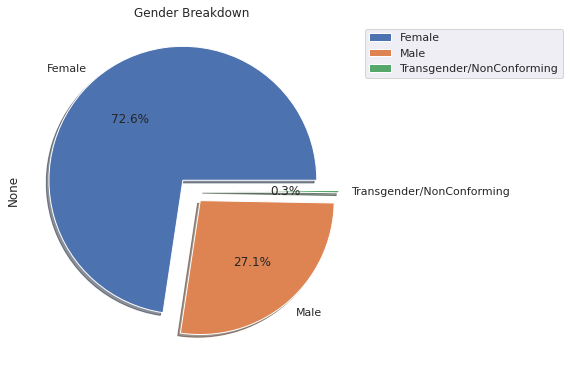

In [38]:
gender_num = ctdc.groupby(['gender']).size(); 

#gender_chart = gender_num.plot(kind='pie', title='Gender Breakdown')

p2 = gender_num.plot(kind='pie', title='Gender Breakdown', figsize = (6,7), 

             legend = ['Female', 'Male', 'Transgender'], explode = (0.1, 0.1 ,0.1), shadow = True, autopct = '%1.1f%%')

p2.legend(bbox_to_anchor = (1, 1))

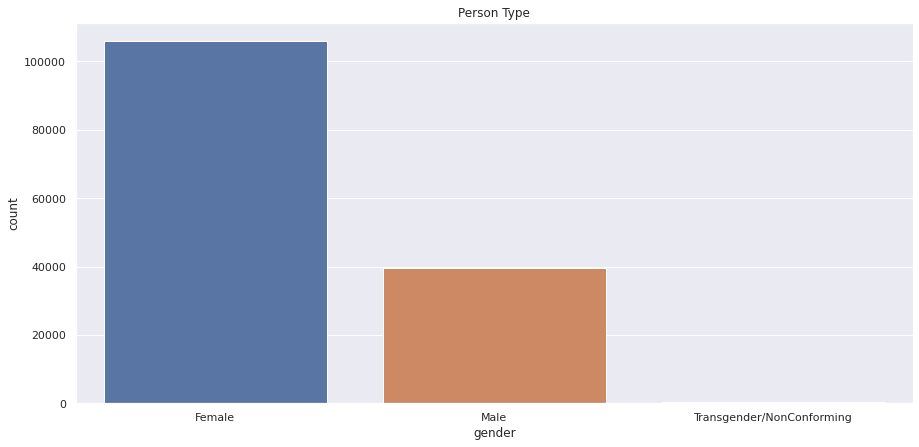

In [39]:
#plt.figure(figsize=(15,7))
plt.title("Person Type")
order = ctdc['gender'].value_counts(ascending=False).index
sns.countplot(x='gender', data=ctdc, order=order)

In [ ]:
#ctdc["gender"].hist()
#plt.show()

In [ ]:
ctdc.insert(loc=0, column='row_num', value=np.arange(len(ctdc)))

Text(0.5, 1.0, 'Year counts by Gender')

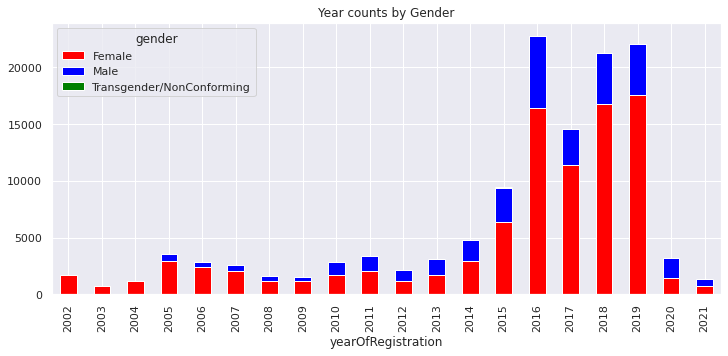

In [43]:
pivot1 = ctdc.pivot_table(index='yearOfRegistration', columns='gender', values='row_num', aggfunc="count")
fig = pivot1.plot(kind="bar", stacked=True, color=["red","blue","green"],figsize=(12,5))
plt.title("Year counts by Gender")

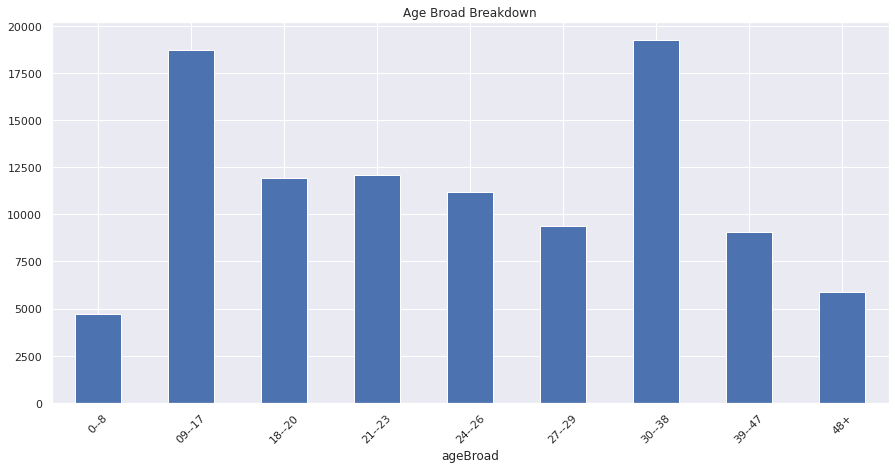

In [44]:
age_num = ctdc.groupby(['ageBroad']).size()
age_chart = age_num.plot(kind='bar', title='Age Broad Breakdown',rot = 45)

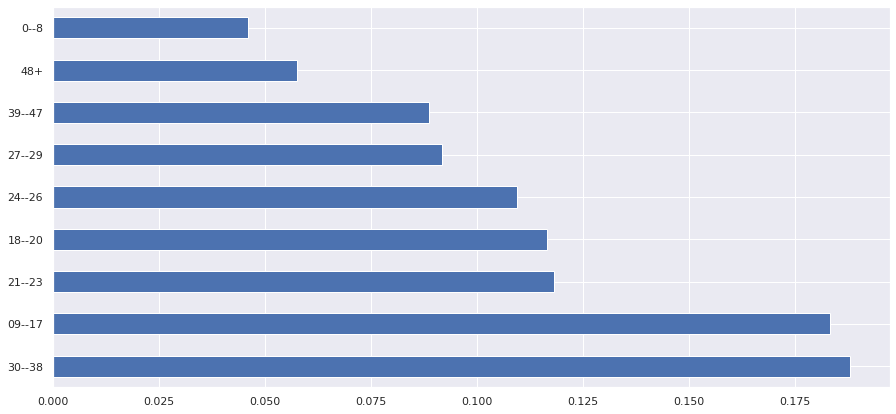

In [45]:
#plot the bar graph of percentage Age Rating categories
ctdc['ageBroad'].value_counts(normalize=True).plot.barh()
plt.show()

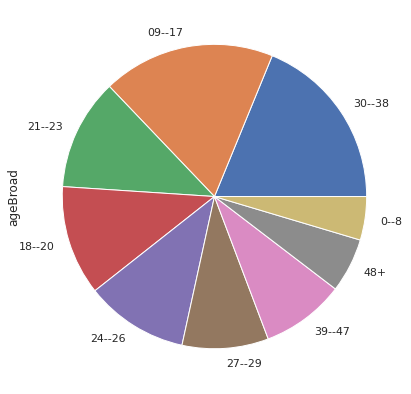

In [46]:
# Replace the horizontal bar plot with a pie chart
ctdc['ageBroad'].value_counts(normalize=True).plot.pie()
plt.show()

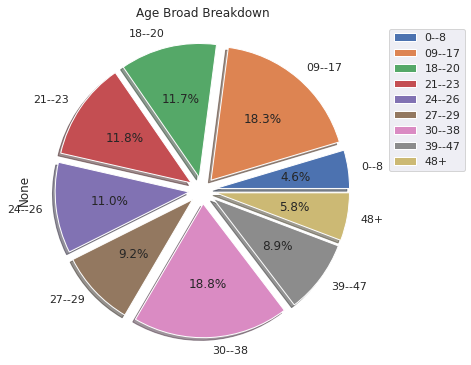

In [47]:
ageBroad_num = ctdc.groupby(['ageBroad']).size(); 

ageBroad_chart = ageBroad_num.plot(kind='pie', 
                       title='Age Broad Breakdown', 
                       figsize = (6,7), 
                      # legend = ['Female', 'Male', 'Transgender'], 
                       explode = (0.1, 0.1 ,0.1,0.1, 0.1 ,0.1,0.1, 0.1 ,0.1), 
                       shadow = True, 
                       autopct = '%1.1f%%')

ageBroad_chart.legend(bbox_to_anchor = (1.3, 1))

Text(0.5, 1.0, 'Gender counts by Age Broad')

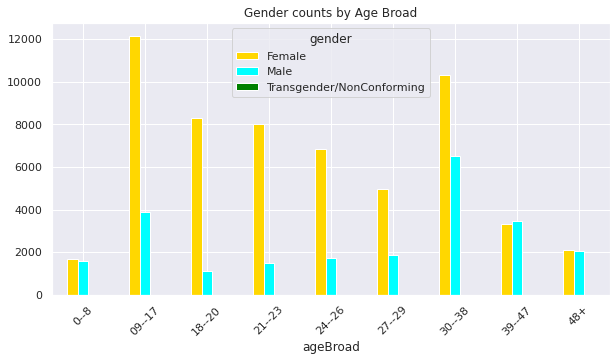

In [48]:
pivot2 = ctdc.pivot_table(index='ageBroad', columns='gender', values='row_num', aggfunc="count")
fig = pivot2.plot(kind="bar", stacked=False, color=["gold","cyan","green"], figsize=(10,5), rot = 45)
plt.title("Gender counts by Age Broad")

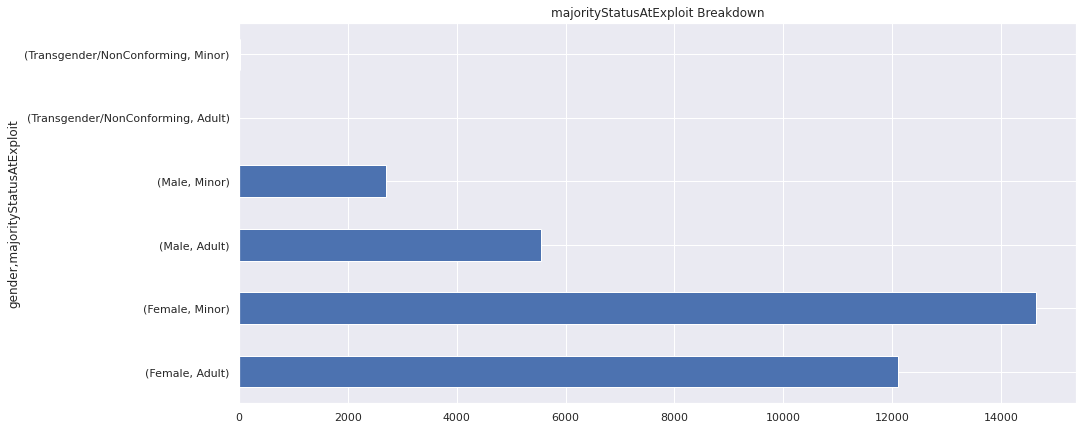

In [49]:
#g4 = ctdc.groupby(['majorityStatusAtExploit']).size()
#p4 = g4.plot(kind='bar', title='majorityStatusAtExploit Breakdown')

maj_gen_num = ctdc.groupby(['gender', 'majorityStatusAtExploit']).size()
maj_gen_chart = maj_gen_num.plot(kind='barh', title='majorityStatusAtExploit Breakdown')

In [50]:
maj_gen_num

gender                     majorityStatusAtExploit
Female                     Adult                      12119
                           Minor                      14651
Male                       Adult                       5553
                           Minor                       2698
Transgender/NonConforming  Adult                          1
                           Minor                         22
dtype: int64

In [ ]:
type(maj_gen_num)

In [52]:
maj_gen_num_fra = maj_gen_num.to_frame()

In [53]:
maj_gen_num_fra.style.background_gradient(cmap='coolwarm')

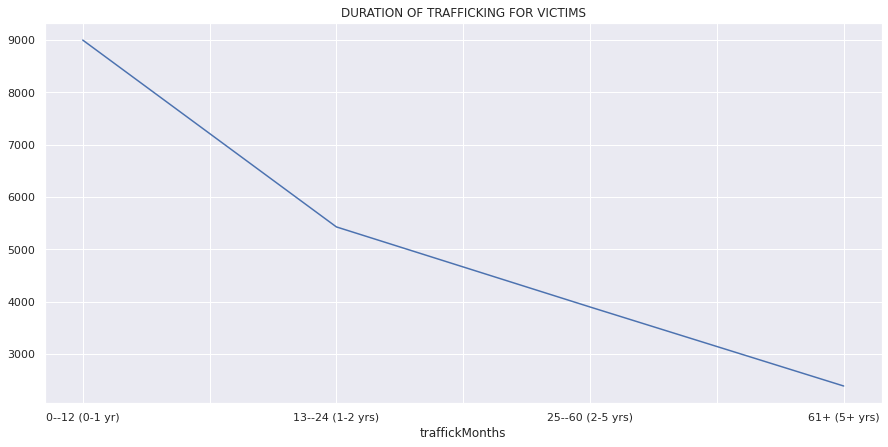

In [54]:
tra_num = ctdc.groupby(['traffickMonths']).size()
tra_chart = tra_num.plot(kind='line', title='DURATION OF TRAFFICKING FOR VICTIMS')

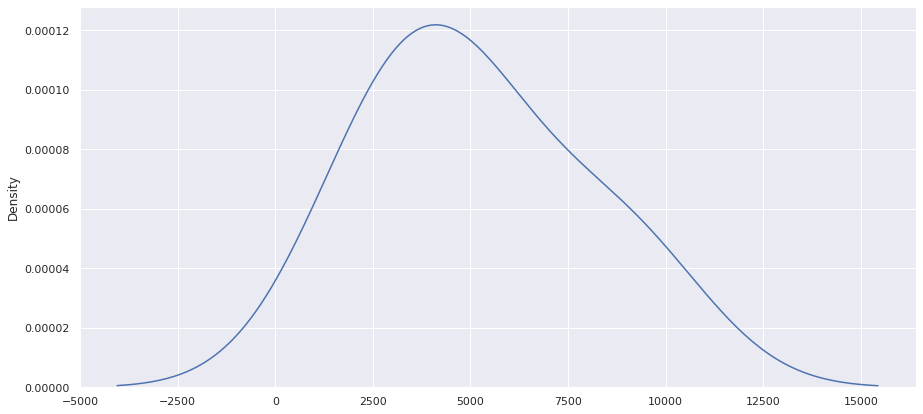

In [55]:
sns.kdeplot(tra_num)

In [ ]:
condition = ctdc['citizenship']==ctdc['CountryOfExploitation']
condition.sum()

20791

In [ ]:
condition_not=ctdc['citizenship']!=ctdc['CountryOfExploitation']
condition_not.sum()

In [ ]:
city_num = ctdc.groupby(['citizenship']).size()
city_num

In [58]:
city_num_df = pd.DataFrame({'CODE':city_num.index, 'num':city_num.values})
city_num_df

,CODE,num
0,AFG,550
1,ALB,440
2,ARE,20
3,ARG,100
4,ARM,20
...,...,...
123,VNM,780
124,YEM,20
125,ZAF,140
126,ZMB,40


Map chart code source

https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b

In [59]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,city_num_df,on='CODE')
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').sort_values(by='num',ascending=False).reset_index()

In [60]:
merge

,index,pop_est,continent,name,CODE,gdp_md_est,geometry,num,latitude,longitude
0,80,44033874,Europe,Ukraine,UKR,352600.0,"POLYGON ((31.78599 52.10168, 32.15944 52.06125...",18480,48.379433,31.165580
1,104,104256076,Asia,Philippines,PHL,801900.0,"MULTIPOLYGON (((120.83390 12.70450, 120.32344 ...",13000,12.879721,121.774017
2,83,3474121,Europe,Moldova,MDA,18540.0,"POLYGON ((26.61934 48.22073, 26.85782 48.36821...",10380,47.411631,28.369885
3,2,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",9690,37.090240,-95.712891
4,79,9549747,Europe,Belarus,BLR,165400.0,"POLYGON ((28.17671 56.16913, 29.22951 55.91834...",4180,53.709807,27.953389
...,...,...,...,...,...,...,...,...,...,...
116,60,6072475,Asia,United Arab Emirates,ARE,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",20,23.424076,53.847818
117,29,360346,North America,Belize,BLZ,3088.0,"POLYGON ((-89.14308 17.80832, -89.15091 17.955...",10,17.189877,88.497600
118,59,10248069,Asia,Jordan,JOR,86190.0,"POLYGON ((35.54567 32.39399, 35.71992 32.70919...",10,30.585164,36.238414
119,23,3753142,North America,Panama,PAN,93120.0,"POLYGON ((-77.35336 8.67050, -77.47472 8.52429...",10,8.537981,-80.782127


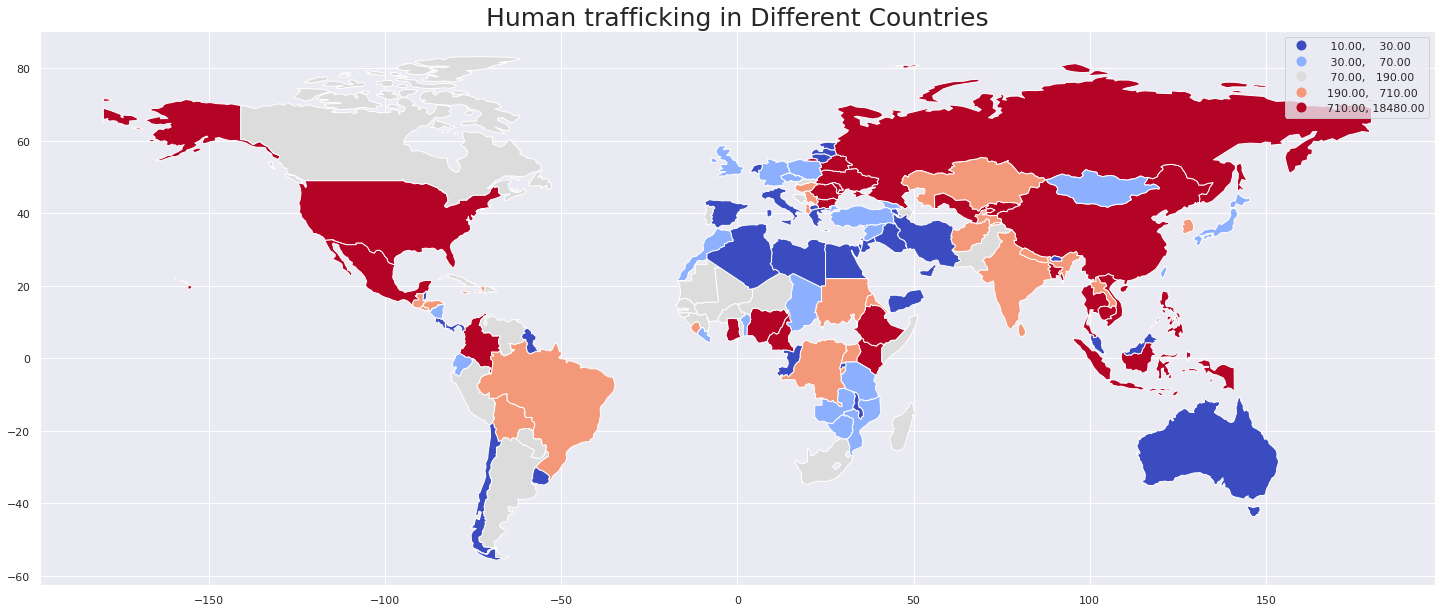

In [62]:
# plot confirmed cases world map 
merge.plot(column='num', scheme="quantiles",
           figsize=(25, 20),
           legend=True,
           cmap='coolwarm')
plt.title('Human trafficking in Different Countries',fontsize=25)
# add countries names and numbers 
#for i in range(0,10):
#    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge.num[i]),size=10)
plt.show()

In [63]:
Cou_ex_num = ctdc.groupby(['CountryOfExploitation']).size()
Cou_ex_num

CountryOfExploitation
AFG     240
ALB     350
ARE    1030
ARG     690
ARM      30
       ... 
VNM     100
VUT     100
YEM      30
ZAF     550
ZMB     120
Length: 141, dtype: int64

In [64]:
Cou_ex_num_df = pd.DataFrame({'CODE':Cou_ex_num.index, 'num':Cou_ex_num.values})
Cou_ex_num_df

,CODE,num
0,AFG,240
1,ALB,350
2,ARE,1030
3,ARG,690
4,ARM,30
...,...,...
136,VNM,100
137,VUT,100
138,YEM,30
139,ZAF,550


In [65]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,Cou_ex_num_df,on='CODE')
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').sort_values(by='num',ascending=False).reset_index()
merge

,index,pop_est,continent,name,CODE,gdp_md_est,geometry,num,latitude,longitude
0,1,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",65880,37.090240,-95.712891
1,15,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.72530 71.09880, 180.00000 ...",11210,61.524010,105.318756
2,5,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",2830,-0.789275,113.921327
3,78,38476269,Europe,Poland,POL,1052000.0,"POLYGON ((23.48413 53.91250, 23.52754 53.47012...",2460,51.919438,19.145136
4,106,31381992,Asia,Malaysia,MYS,863000.0,"MULTIPOLYGON (((100.08576 6.46449, 100.25960 6...",2270,4.210484,101.975766
...,...,...,...,...,...,...,...,...,...,...
124,35,11038805,Africa,Benin,BEN,24310.0,"POLYGON ((2.69170 6.25882, 1.86524 6.14216, 1....",10,9.307690,2.315834
125,29,31304016,South America,Venezuela,VEN,468600.0,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810...",10,6.423750,-66.589730
126,61,7126706,Asia,Laos,LAO,40960.0,"POLYGON ((107.38273 14.20244, 106.49637 14.570...",10,19.856270,102.495496
127,96,23232413,Oceania,Australia,AUS,1189000.0,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",10,-25.274398,133.775136


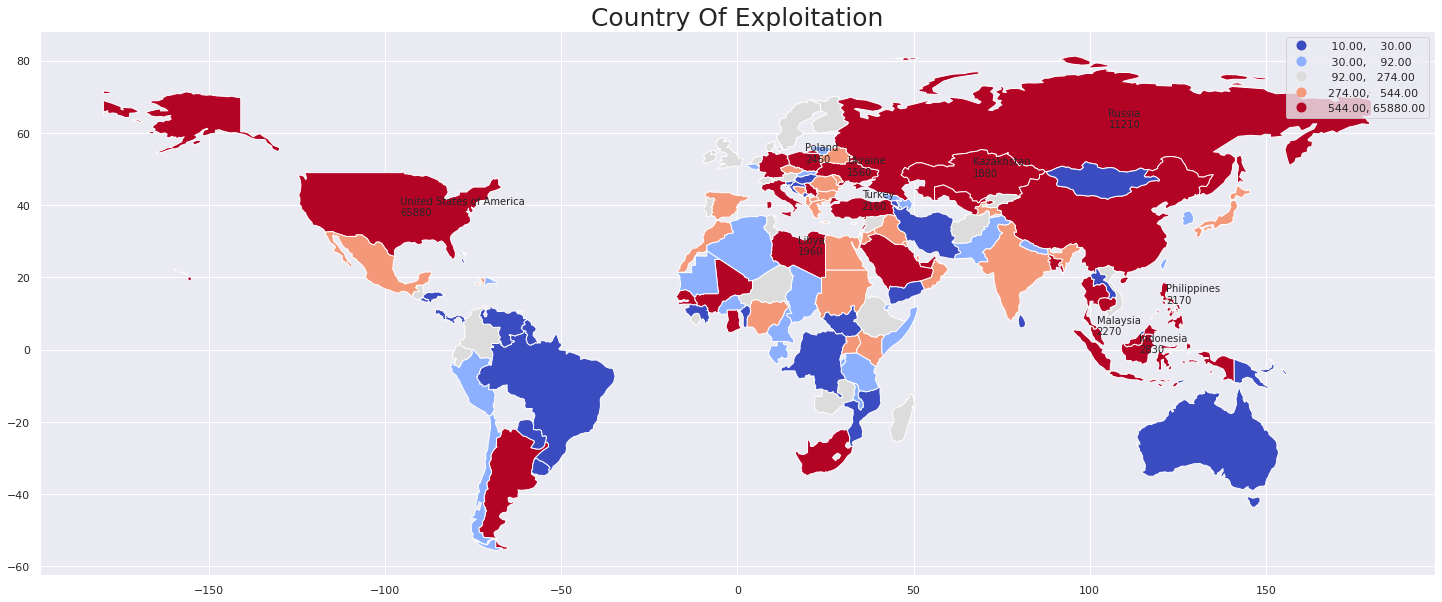

In [66]:
# plot confirmed cases world map 
merge.plot(column='num', scheme="quantiles",
           figsize=(25, 20),
           legend=True,
           cmap='coolwarm')
plt.title('Country Of Exploitation',fontsize=25)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge.num[i]),size=10)
plt.show()

In [69]:
feature_names=list(ctdc.columns[7:22])
means_con_num_fra = pd.DataFrame([[f, ctdc[f].dtype, ctdc[f].sum().astype(int)] for f in feature_names], 
              columns=['feature', 'type', 'sum_values'])

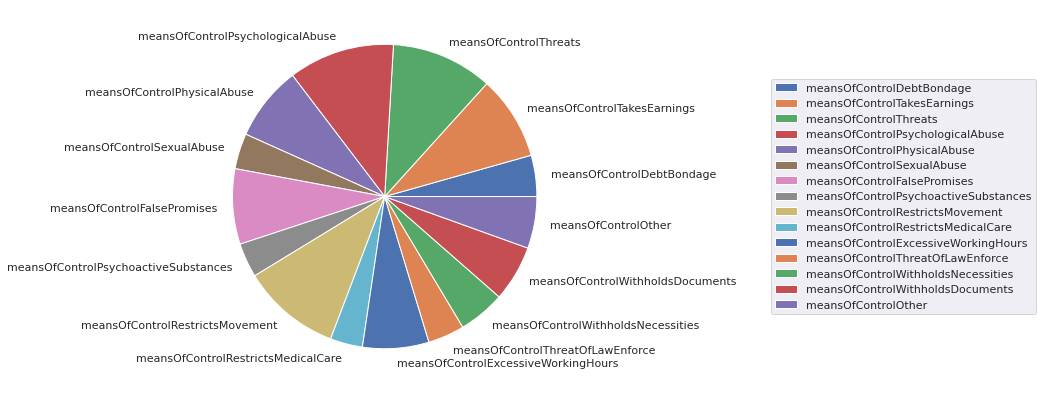

In [71]:
y = means_con_num_fra.sum_values
mylabels = means_con_num_fra.feature

plt.pie(y, labels = mylabels)
plt.legend(loc ="center left",
          bbox_to_anchor =(1.5, 0, 0.5, 1))
plt.show() 

Pie chart code source

https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/

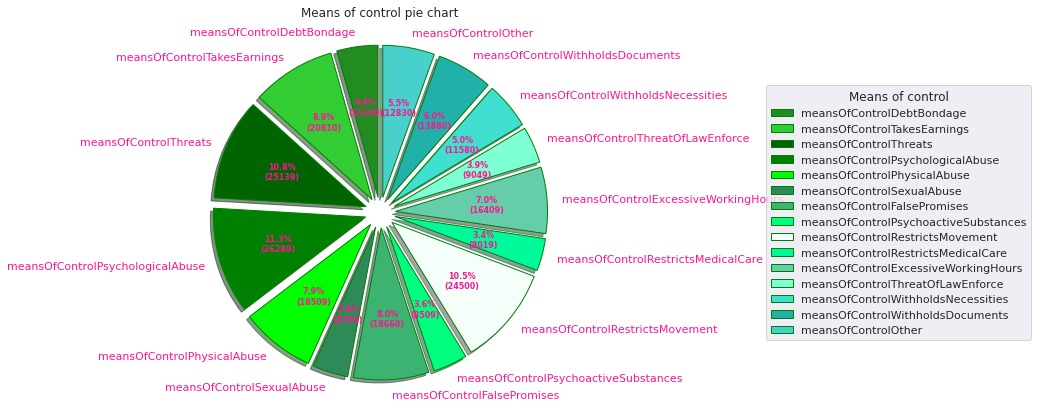

In [72]:
cars = means_con_num_fra.feature
 
data = means_con_num_fra.sum_values

 # Creating explode data
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
 
# Creating color parameters
colors = (
     "forestgreen","limegreen","darkgreen",
     "green","lime","seagreen",
     "mediumseagreen","springgreen","mintcream",
     "mediumspringgreen","mediumaquamarine","aquamarine",
     "turquoise","lightseagreen","mediumturquoise"
 )
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = cars,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="deeppink"))
 
# Adding legend
ax.legend(wedges, cars,
          title ="Means of control",
          loc ="center left",
          bbox_to_anchor =(1.5, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Means of control pie chart")
 
# show plot
plt.show()

In [73]:
feature_names=list(ctdc.columns[26:31])
type_lab_num_fra = pd.DataFrame([[f, ctdc[f].dtype, ctdc[f].sum().astype(int)] for f in feature_names], 
              columns=['feature', 'type', 'sum_values'])

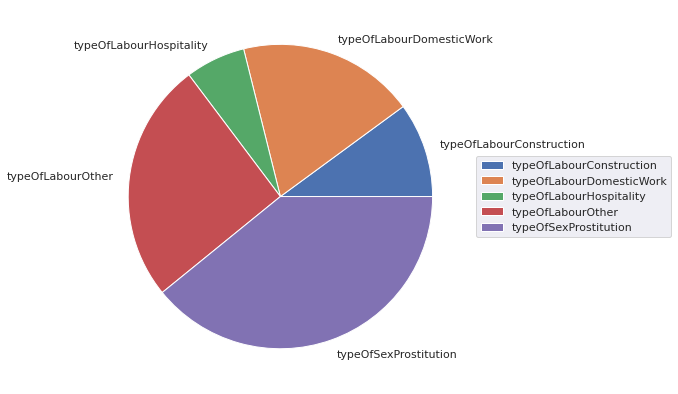

In [76]:
y = type_lab_num_fra.sum_values
mylabels = type_lab_num_fra.feature

plt.pie(y, labels = mylabels)
plt.legend(loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show() 

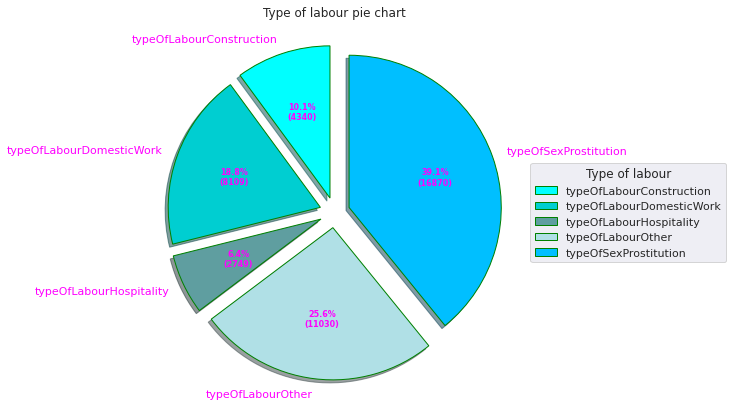

In [78]:
cars = type_lab_num_fra.feature
 
data = type_lab_num_fra.sum_values

 # Creating explode data
explode = (0.1,0.1,0.1,0.1,0.1)
 
# Creating color parameters
colors = (
    "cyan", "darkturquoise","cadetblue","powderblue","deepskyblue",
 )
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = cars,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="fuchsia"))
 
# Adding legend
ax.legend(wedges, cars,
          title ="Type of labour",
          loc ="center left",
          bbox_to_anchor =(1.0, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Type of labour pie chart")
 
# show plot
plt.show()

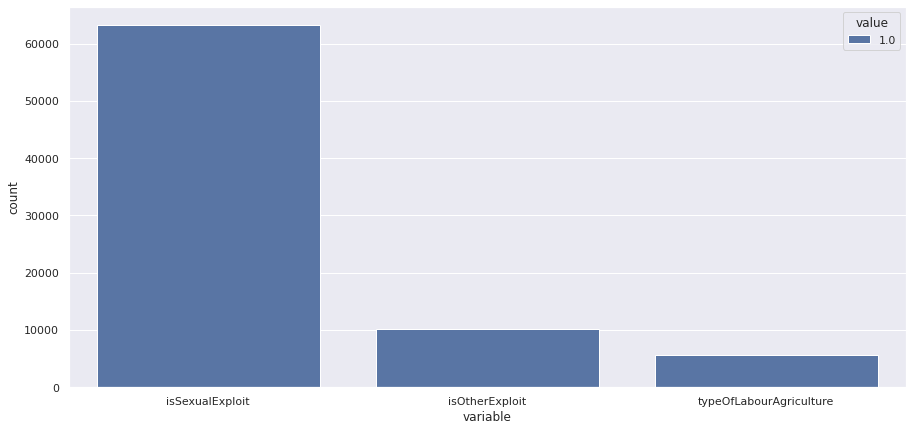

In [79]:
ctdc_1= ctdc.iloc[:,23:26]
sns.set_theme(style="ticks")
#exercise = sns.load_dataset("exercise")
sns.set(rc={"figure.figsize":(15,7)}) 
sns.countplot(x="variable", hue="value", data=pd.melt(ctdc_1))

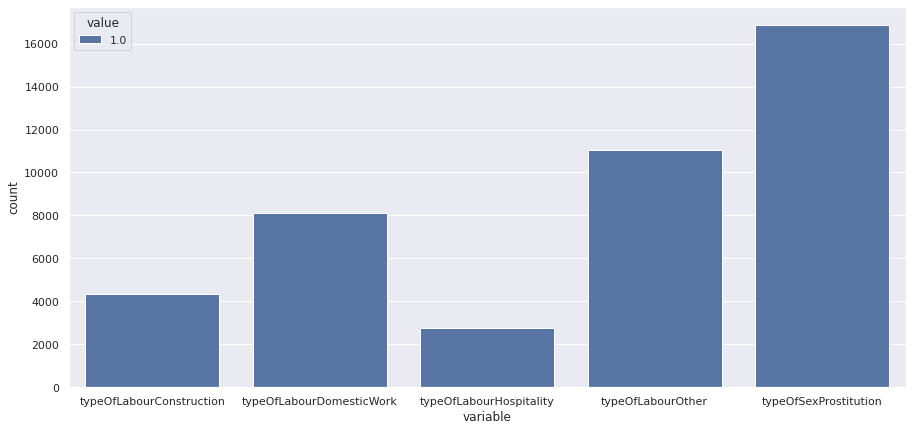

In [80]:
ctdc_1= ctdc.iloc[:,26:31]
sns.set_theme(style="ticks")
#exercise = sns.load_dataset("exercise")
sns.set(rc={"figure.figsize":(15,7)}) 
sns.countplot(x="variable", hue="value", data=pd.melt(ctdc_1))

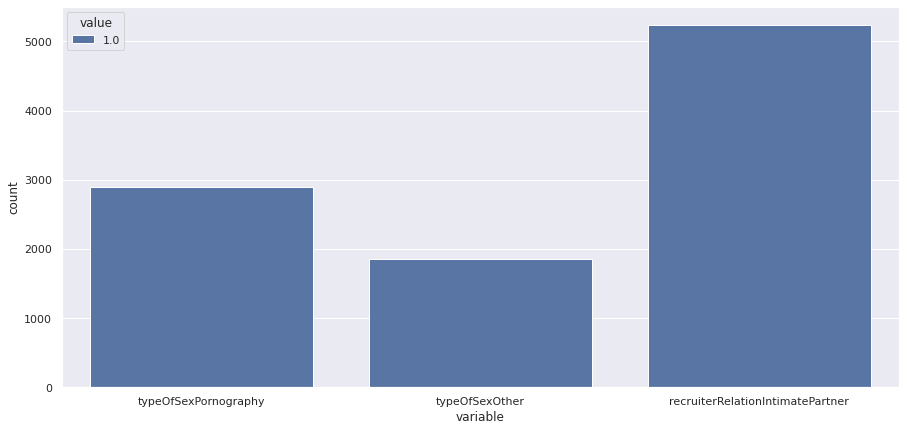

In [81]:
ctdc_1= ctdc.iloc[:,31:34]
sns.set_theme(style="ticks")
#exercise = sns.load_dataset("exercise")
sns.set(rc={"figure.figsize":(15,7)}) 
sns.countplot(x="variable", hue="value", data=pd.melt(ctdc_1))

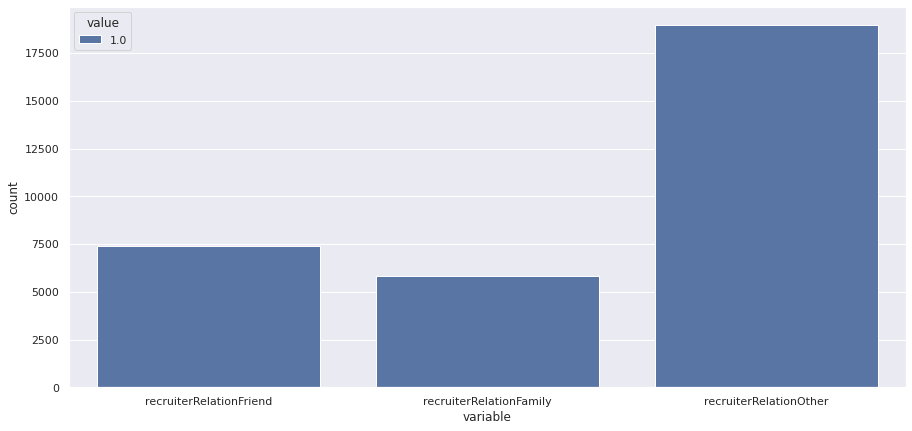

In [82]:
ctdc_1= ctdc.iloc[:,34:38]
sns.set_theme(style="ticks")
#exercise = sns.load_dataset("exercise")
sns.set(rc={"figure.figsize":(15,7)}) 
sns.countplot(x="variable", hue="value", data=pd.melt(ctdc_1))